## Flex 76 Mixing Experiment 

This is the result from the running GOTM.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from netCDF4 import Dataset
import os
from os import path
import pandas as pd

In [2]:
data = './flex.nc' 
gl = xr.open_dataset(data,decode_times=True)
gl

<xarray.Dataset> Size: 17MB
Dimensions:             (time: 495, lon: 1, lat: 1, z: 145, zi: 146)
Coordinates:
  * time                (time) datetime64[ns] 4kB 1976-04-06T06:00:00 ... 197...
  * lon                 (lon) float32 4B 0.32
  * lat                 (lat) float32 4B 58.92
    z                   (time, z, lat, lon) float32 287kB ...
    zi                  (time, zi, lat, lon) float32 289kB ...
Data variables: (12/106)
    temp                (time, z, lat, lon) float32 287kB ...
    salt                (time, z, lat, lon) float32 287kB ...
    rho                 (time, z, lat, lon) float32 287kB ...
    temp_obs            (time, z, lat, lon) float32 287kB ...
    salt_obs            (time, z, lat, lon) float32 287kB ...
    u                   (time, z, lat, lon) float32 287kB ...
    ...                  ...
    us0                 (time, lat, lon) float32 2kB ...
    vs0                 (time, lat, lon) float32 2kB ...
    ds                  (time, lat, lon) float32 2kB ...
    Ekin                (time, lat, lon) float32 2kB ...
    Epot                (time, lat, lon) float32 2kB ...
    Eturb               (time, lat, lon) float32 2kB ...
Attributes:
    title:    GOTM Simulation
    comment:  file created by flexout - https://github.com/BoldingBruggeman/f...

In [3]:
xq,yq = np.meshgrid(np.squeeze(gl.time),np.squeeze(gl.z[1,:]))

Text(0.5, 1.0, 'Temperature [GOTM]')

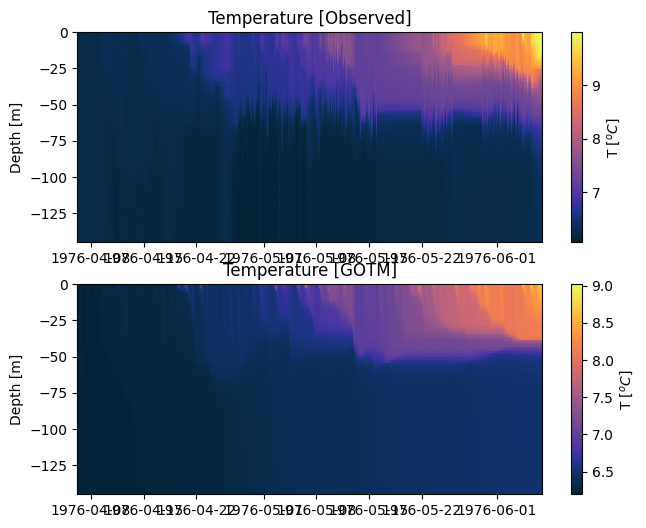

In [4]:
import cmocean.cm as cmo

# Plot Synoptics
fig, ax = plt.subplots(2,1, figsize=(7.5, 6))
pc1=ax[0].pcolor(xq,yq,np.transpose(np.squeeze(gl.temp_obs.to_numpy())),cmap=cmo.thermal)
ax[0].set_ylabel('Depth [m]')
cbar1 = plt.colorbar(pc1, ax=ax[0])
cbar1.set_label('T [$^o C$]')
ax[0].set_title('Temperature [Observed]')

pc2=ax[1].pcolor(xq,yq,np.transpose(np.squeeze(gl.temp.to_numpy())),cmap=cmo.thermal)
ax[1].set_ylabel('Depth [m]')
cbar2 = plt.colorbar(pc2, ax=ax[1])
cbar2.set_label('T [$^o C$]')
ax[1].set_title('Temperature [GOTM]')

Text(0.5, 1.0, 'Salinity [GOTM]')

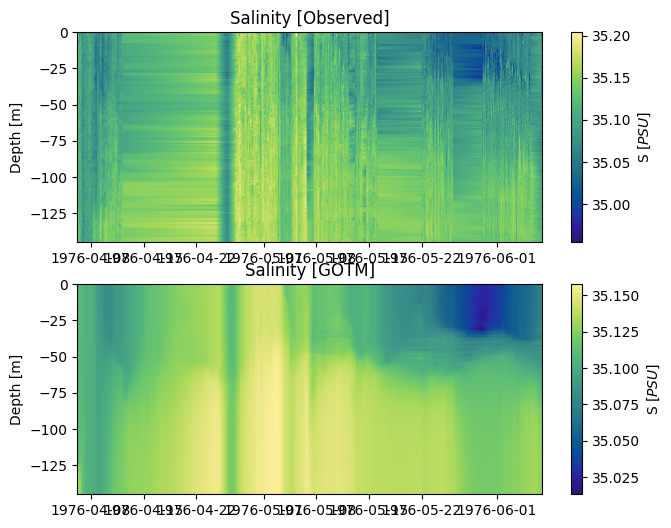

In [7]:
# Plot Synoptics
fig, ax = plt.subplots(2,1, figsize=(7.5, 6))
pc1=ax[0].pcolor(xq,yq,np.transpose(np.squeeze(gl.salt_obs.to_numpy())),cmap=cmo.haline)
ax[0].set_ylabel('Depth [m]')
cbar1 = plt.colorbar(pc1, ax=ax[0])
cbar1.set_label('S [$PSU$]')
ax[0].set_title('Salinity [Observed]')
#pc1.set_clim(34.4,35)

pc2=ax[1].pcolor(xq,yq,np.transpose(np.squeeze(gl.salt.to_numpy())),cmap=cmo.haline)
ax[1].set_ylabel('Depth [m]')
cbar2 = plt.colorbar(pc2, ax=ax[1])
cbar2.set_label('S [$PSU$]')
ax[1].set_title('Salinity [GOTM]')
#pc2.set_clim(34.4,35)

In [8]:
xqi,yqi = np.meshgrid(np.squeeze(gl.time),np.squeeze(gl.zi[1,:]))

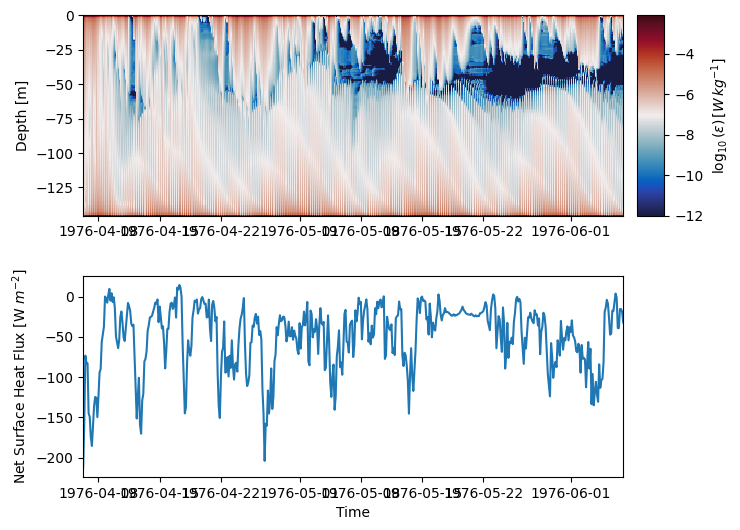

In [17]:
# Create a figure with GridSpec
fig = plt.figure(figsize=(7.5, 6))
gs = fig.add_gridspec(2, 2, width_ratios=[1, 0.05], height_ratios=[1, 1])

ax0 = fig.add_subplot(gs[0, 0])
pc1 = ax0.pcolor(xqi,yqi,np.transpose(np.log10(np.squeeze(gl.eps.to_numpy()))), cmap=cmo.balance)
ax0.set_ylabel('Depth [m]')
ax0.set_xlim(gl.time[0], gl.time[-1])

cbar_ax = fig.add_subplot(gs[0, 1])
fig.colorbar(pc1, cax=cbar_ax, label=r'$\log_{10}(\epsilon) \, [W \, kg^{-1}]$')

ax1 = fig.add_subplot(gs[1, 0])
ax1.plot(gl.time, np.squeeze(gl.heat))
ax1.set_ylabel('Net Surface Heat Flux [W $m^{-2}$]')
ax1.set_xlim(gl.time[0], gl.time[-1])
ax1.set_xlabel('Time')

# Hide the empty subplot area in the second row, second column
gs.update(wspace=0.05, hspace=0.3)
plt.show()